In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
kc_house_data = pd.read_csv('data/kc_house_data.csv')

# Exploration

In [3]:
kc_house_data.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Cleaning

In [6]:
kc_house_data[kc_house_data.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [7]:
## Remove duplicates; keep last date sold
kc_house_data.drop_duplicates(subset='id', keep='last', inplace=True)

#### Price and ID Columns

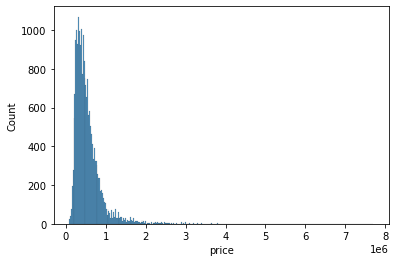

In [8]:
sns.histplot(kc_house_data.price);

In [9]:
## Reorder columns so that the target variable is the first column
## Exclude 'id' column
column_headers = list(kc_house_data.columns)
column_headers = [column_headers[2]]+[column_headers[1]]+column_headers[3:]
kc_house_data = kc_house_data[column_headers]

## Change price column from float to integer
kc_house_data = kc_house_data.astype({'price':'int'})

#### Date Column

In [14]:
## Split 'date' column into 'day', 'month', and 'year' columns
kc_house_data.date = pd.to_datetime(kc_house_data.date)
kc_house_data['month_sold'] = kc_house_data.date.dt.month
kc_house_data['day_sold'] = kc_house_data.date.dt.day
kc_house_data['year_sold'] = kc_house_data.date.dt.year

## Reorder columns again
## Exclude 'date' column
column_headers = list(kc_house_data.columns)
column_headers = [column_headers[0]]+column_headers[20:]+column_headers[2:20]
kc_house_data = kc_house_data[column_headers]

#### Bedrooms Column

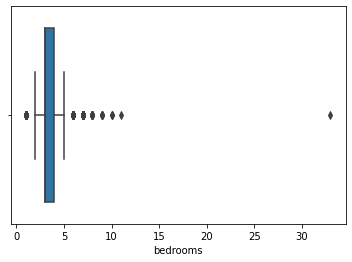

In [23]:
sns.boxplot(x = kc_house_data.bedrooms);

In [9]:
## Remove just one extreme outlier for initial model
outlier_index = kc_house_data[kc_house_data.bedrooms == 33].index
kc_house_data.drop(outlier_index, inplace=True)

#### Bathrooms Column

In [10]:
len(kc_house_data.price)

21419

#### Waterfront Column

In [9]:
kc_house_data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

#### View Column

In [11]:
kc_house_data.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
kc_house_data.view.isna().sum()

63

In [13]:
kc_house_data.view.replace(np.NaN, 0.0, inplace=True)
kc_house_data = kc_house_data.astype({'view':'int'})

#### Sqft_basement Column

In [14]:
kc_house_data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
417.0         1
516.0         1
2190.0        1
2310.0        1
1920.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [15]:
type(kc_house_data.sqft_basement[0])

str

In [16]:
kc_house_data.sqft_basement.replace('?', '0.0', inplace=True)
kc_house_data = kc_house_data.astype({'sqft_basement':'float'}).astype({'sqft_basement':'int'})

#### Yr_renovated and Mst_rcnt_cnst Columns

In [17]:
kc_house_data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
kc_house_data.yr_renovated.isna().sum()

3842

In [19]:
## This column also seems strange
## Make new column 'mst_rcnt_cnst' that updates the year built if renovated
kc_house_data.yr_renovated.replace(np.NaN, 0.0, inplace=True)
kc_house_data = kc_house_data.astype({'yr_renovated':'int'})
kc_house_data['mst_rcnt_cnst'] = None

In [20]:
def cnst_calc(iteration):
    if iteration['yr_renovated'] != 0:
        val = iteration['yr_renovated']
    else:
        val = iteration['yr_built']
    return val

In [21]:
kc_house_data.mst_rcnt_cnst = kc_house_data.apply(cnst_calc, axis=1)
kc_house_data = kc_house_data.astype({'mst_rcnt_cnst':'int'})
kc_house_data.drop('yr_renovated', axis=1, inplace=True)

#### Lat and Long Columns

In [25]:
kc_house_data.drop(['lat', 'long'], axis=1, inplace=True)

In [10]:
kc_house_data.head(15)

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000,5/12/2014,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500,6/27/2014,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850,1/15/2015,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500,4/15/2015,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000,3/12/2015,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [29]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21597 non-null  int32  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int32  
 11  yr_built       21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  mst_rcnt_cnst  21597 non-null  int32  
dtypes: float64(3), int32(3), int64(10)
memory usage: 2.4 MB
